In [131]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
import warnings
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
print('\033[33mall libraries are imported\033[0m')

all libraries are imported


In [113]:
df = pd.read_csv('wiki_movie_plots_deduped.csv')

In [114]:
data = df['Plot'].tolist()[:100]

# Vorverarbeitung 

* Tokenisierung 'lexikalische Analyse'
* Entfernung von Stop-words
* Stemming 

In [115]:
# tokenisierung 
tokens = [word_tokenize(sentence) for sentence in data]

In [116]:
flattened_data = [item for sublist in tokens for item in sublist]
print("\033[33mDokumente sind tokensiert !\033[0m")

Dokumente sind tokensiert !


In [117]:
stop_words = set(stopwords.words('english'))
stop_words = list(stop_words)

In [118]:
ps = PorterStemmer()
processed_data = [token for token in flattened_data if token.lower() not in stop_words]
processed_data = [token.split('—')[0] for token in processed_data]
processed_data = [token.split('-')[0] for token in processed_data]
processed_data = [token for token in processed_data if token not in string.punctuation]
processed_data = [token for token in processed_data if token not in ["``", "''"]]
processed_data = [token for token in processed_data if not re.match(r'^\d+$|\d+\-\d+', token)]
processed_data = [ps.stem(token) for token in processed_data]

- Erste Methode 

In [119]:
token_dic = {}
counter = 0
for tok in processed_data:
    
    # the token is not in the dictionary 
    if tok not in token_dic:
        token_dic[tok] = 1
        
    # the token is in the dictionary
    else:
        token_dic[tok] += 1 

sorted_tok_freq = dict(sorted(token_dic.items(), key=lambda x: x[1], reverse=True))

- Zweite Methode

In [137]:
token_dic_ = {}

for tok in processed_data:
    token_dic_[tok] = token_dic_.get(tok, 0) + 1

In [168]:
sorted_tok_freq_ = dict(sorted(token_dic_.items(), key=lambda x: x[1], reverse=True))

# Nltk FreqDist

In [177]:
# using FreqDist of Nltk 
fdist = FreqDist(token for token in processed_data)
fdist = dict(sorted(fdist.items(), key=lambda x: x[1], reverse=True))

# Visualisierung

In [181]:
list(fdist.values())[-2:]

[1, 1]

In [183]:
# visualisierung 
def visualize(methode='eigene', Anzahl=10, freq='top'):
    
    # eigene methode 
    if methode == 'eigene':
        dictionary = sorted_tok_freq_
    else:
        dictionary = fdist
    
    dictionary_k = list(dictionary.keys())
    dictionary_v = list(dictionary.values())
    
    if freq == 'top':
         menge_k = dictionary_k[:Anzahl]
         menge_v = dictionary_v[:Anzahl]
    else:
         menge_k = dictionary_k[-Anzahl:]
         menge_v = dictionary_v[-Anzahl:]
        
        
    plt.plot(menge_k, menge_v)
    plt.title('Die Häufigkeit von Tokens')
    plt.xlabel('Samples')
    plt.ylabel('Counts')
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
    plt.xticks(rotation='vertical')
    plt.show()


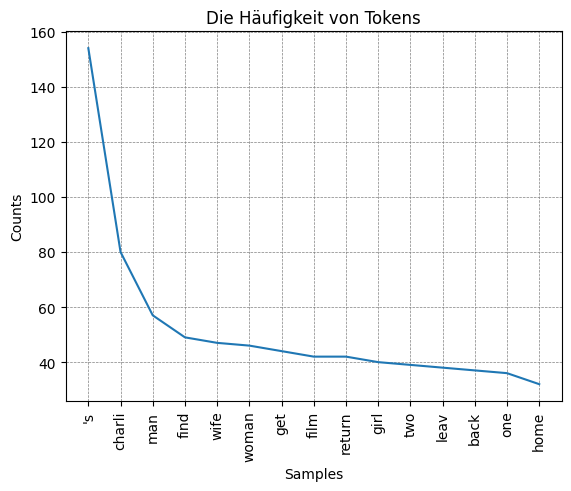

In [188]:
visualize('FreqDist', 15)

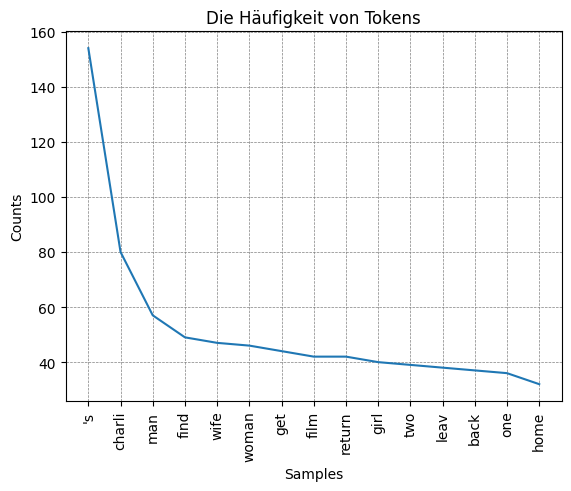

In [189]:
visualize('eigene', 15)

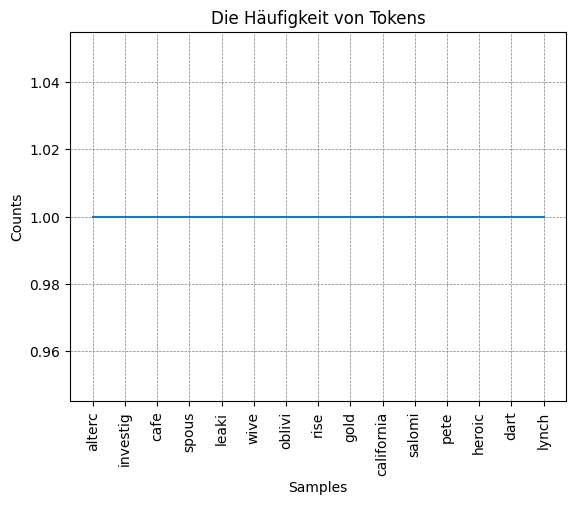

In [186]:
visualize('FreqDist', 15, 'least')

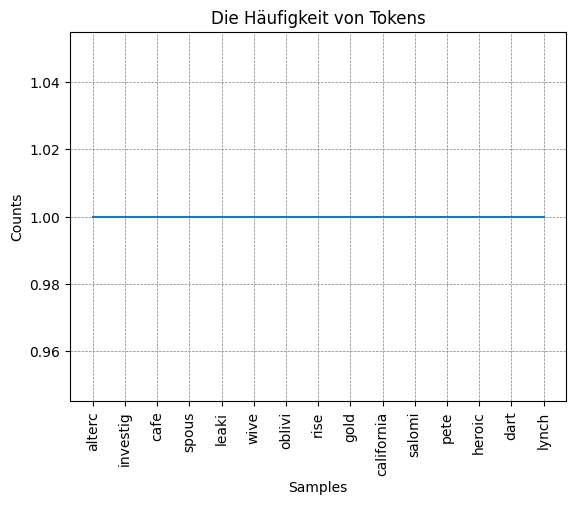

In [187]:
visualize('eigene', 15, 'least')